In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt

In [14]:
expl_method = "GradCAM"
# expl_method = 'LayerXAct'
# expl_method = 'LayerDL'
# transform = False
# transform = True
# transform = ['color'] 
# transform = ['spatial', 'noise', 'color']
transform = None
tester = "ConfAOPC"
# tester = "OrigAOPC"
seed = 0
mode = "insertion"

In [15]:
with open(f"val_center_crop_224_seed_{seed}.npy", "rb") as f:
    filelist = np.load(f)

In [16]:
base = torch.zeros(21)
our = torch.zeros(21)
read_num = 0

for filepath in filelist:
    filename = os.path.basename(filepath)

    log_name = f"./aopc_results/{tester}_transform_{transform}_mode_{mode}_expl_method_{expl_method}_seed_{seed}_{filename}.pt"
    try:
        log = torch.load(log_name)
        base += log[0]
        our += log[1]
        read_num += 1
    except:
        break

In [17]:
base / read_num


tensor([0.0011, 0.0020, 0.0038, 0.0059, 0.0074, 0.0093, 0.0121, 0.0153, 0.0187,
        0.0219, 0.0249, 0.0295, 0.0342, 0.0385, 0.0429, 0.0481, 0.0549, 0.0613,
        0.0696, 0.0771, 0.0830])

In [18]:
our / read_num

tensor([0.0011, 0.0018, 0.0035, 0.0061, 0.0083, 0.0103, 0.0131, 0.0162, 0.0197,
        0.0231, 0.0265, 0.0309, 0.0357, 0.0404, 0.0464, 0.0535, 0.0598, 0.0659,
        0.0734, 0.0774, 0.0802])

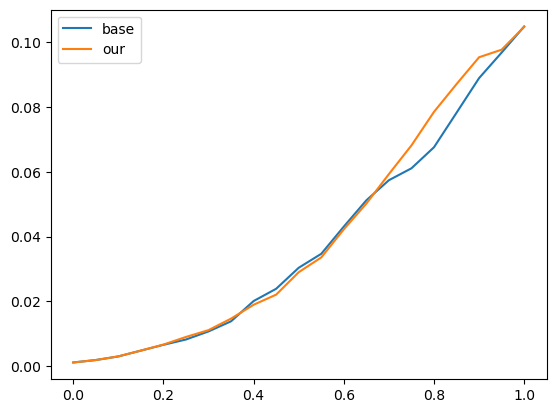

In [13]:
plt.plot(np.arange(0, 1.05, 0.05), (base / read_num), label="base")
plt.plot(np.arange(0, 1.05, 0.05), our / read_num, label = "our")
plt.legend()
